# Road Traffic Severity Classification

![](road_traffic.jpg)

## Problem Description

Every year the lives of approximately 1.3 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.

Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured.
This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 

## 1. Loading The Libraries

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Exploration and  Preprocessing

In [2]:
df = pd.read_csv('dataset.csv')

#### What are the dimensions of the dataset?

In [3]:
df.shape

(12316, 32)

There are 12,316 records and 32 attributes

In [4]:
# Reading first few records of the dataset
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
# List of all the columns
list(df)

['Time',
 'Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

#### Description of the Attributes

- time : time of the accident
- day_of_week : the day in which accident took place
- age_band_of_driver : the age bracket of the driver
- sex_of_driver : gender of the driver involved
- driving_experience : how experienced was the driver
- type of vehicle : what type of vehicle was involved
- owner of vehicle : who owned the vehicle?
- type_of_junction : what was the tpye of junction(Y-junction/T-Junction/U Turn/O-Junction)
- road_surface_type : what was the type of road(asphalt/gravel)

#### Datatypes of the Columns?

In [6]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

Only Number_of_vehicles and Number_of_causalties are integer type which clearly indicates the other are categorical features

#### Summary Statistics

In [7]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


We observe the there are only **Two Numerical Features:**
- Number_of_vehicles_involved
- Number_of_causalities

All the other **30 columns are Categorical in nature**

On an average the number of vehicles involved is 2 and the number of causalities is 1

The maximum number of causalities is 7 and the maximum number of vehicles involved is 8

#### Analyzing the missing data

In [8]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

We can notice that **Defect_of_vehicle** and the **Service_year_of_vehicle** have the highest missing values

#### Percentage of Missing Data

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df = missing_value_df.reset_index()

In [10]:
missing_value_df = missing_value_df.drop(['column_name'],axis = 1)

In [11]:
missing_value_df.columns = ['column_name','percent_missing']

In [12]:
missing_value_df.sort_values(by = 'percent_missing',ascending = False,inplace= True)
missing_value_df.reset_index(inplace = True)

### Top 5 columns with most missing values

In [13]:
missing_value_df.head()

,index,column_name,percent_missing
0,10,Defect_of_vehicle,35.945112
1,9,Service_year_of_vehicle,31.893472
2,27,Work_of_casuality,25.966223
3,28,Fitness_of_casuality,21.394933
4,7,Type_of_vehicle,7.713543


### Handling Missing Data for Numerical Features

**Box Plot Analysis**

<AxesSubplot:xlabel='Number_of_vehicles_involved'>

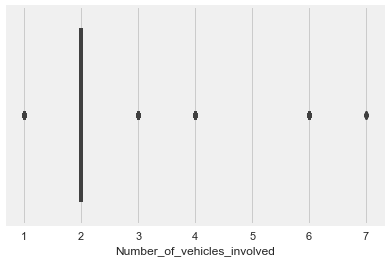

In [137]:
sns.boxplot(x = df['Number_of_vehicles_involved'])

<AxesSubplot:ylabel='Density'>

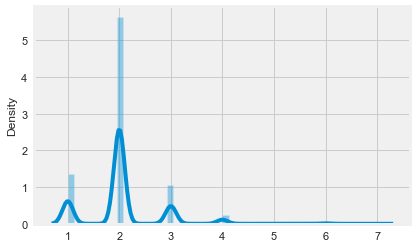

In [138]:
sns.distplot(x = df['Number_of_vehicles_involved'])

In [142]:
df.skew(axis=0)

Number_of_vehicles_involved    1.323454
Number_of_casualties           2.344769
dtype: float64

The data is heavily skewed for number of vehicles involed. So we can impute by median

In [143]:
df['Number_of_vehicles_involved'].unique()

array([2, 1, 3, 6, 4, 7], dtype=int64)

None of the numerical features have missing values so we dont have to impute

### Number of Unique Classes for Categorical Features

In [70]:
df.describe(include='object')

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,7,5,3,7,4,7,17,4,6,3,...,13,4,3,6,4,7,5,9,20,3
top,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


#### What are the unique classes for the Classification Features of the Dataset?

In [14]:
df['Day_of_week'].unique()

array(['Monday', 'Sunday', 'Friday', 'Wednesday', 'Saturday', 'Thursday',
       'Tuesday'], dtype=object)

In [15]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [16]:
df['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

**Replace unknown with NaN in this feature**

In [149]:
df['Driving_experience'].mask(df['Driving_experience'] == 'nan', 'NaN', inplace=True)

In [150]:
df['Driving_experience'].mask(df['Driving_experience'] == 'unknown', 'NaN', inplace=True)

In [17]:
df["Area_accident_occured"].unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', nan, 'Other', ' Church areas',
       '  Market areas', 'Unknown', 'Rural village areas',
       ' Outside rural areas', ' Hospital areas', 'School areas',
       'Rural village areasOffice areas', 'Recreational areas'],
      dtype=object)

In [18]:
df["Types_of_Junction"].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [152]:
df['Types_of_Junction'].mask(df['Types_of_Junction'] == 'nan', 'NaN', inplace=True)

In [19]:
df["Weather_conditions"].unique()

array(['Normal', 'Raining', 'Raining and Windy', 'Cloudy', 'Other',
       'Windy', 'Snow', 'Unknown', 'Fog or mist'], dtype=object)

In [20]:
df["Accident_severity"].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

Since accident severity is our target variable and there are three classes, we are dealing with a multi class problem here.

The prominent classes are : 
- Slight Injury
- Serious Injury
- Fatal Injury

### Handling Missing Values for Categorical Variables

In [153]:
df['Types_of_Junction'].mode()

0    Y Shape
dtype: object

Mode of Types of Junction is Y - Shape

Similarly we can find the mode for the other features

In [158]:
df =  df.fillna(df.mode().iloc[0])

There are no null values now

In [159]:
df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

#### Is there class imbalance in the data?

In [21]:
df["Accident_severity"].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

Yes there is class imbalance because Slight Injury Class has 10,000 odd values whereas the other two classes have only 1743 and 158 values. 

Let's deal with class imbalance a little later but keep this point in mind

### Analysis of Time Column 

**Convert time column to datetime**

In [22]:
pd.to_datetime(df['Time'])

0       2022-07-11 17:02:00
1       2022-07-11 17:02:00
2       2022-07-11 17:02:00
3       2022-07-11 01:06:00
4       2022-07-11 01:06:00
                ...        
12311   2022-07-11 16:15:00
12312   2022-07-11 18:00:00
12313   2022-07-11 13:55:00
12314   2022-07-11 13:55:00
12315   2022-07-11 13:55:00
Name: Time, Length: 12316, dtype: datetime64[ns]

In [23]:
df1 = df

### Categorizing Time Values

In this section,let's bin time values into `Morning`,`Afternoon`,`Evening` and `Night` classes

In [33]:
df1 = df1.reset_index()

In [34]:
df1

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2022-07-11 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2022-07-11 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,2022-07-11 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2022-07-11 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2022-07-11 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2022-07-11 16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,2022-07-11 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,2022-07-11 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,2022-07-11 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [35]:
df1['Time'] = df1['Time'].dt.time

In [36]:
df1

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [45]:
df2 = df1

In [49]:
df2['Time']=df2['Time'].astype(str)

In [99]:
df2['Hours'] = pd.to_datetime(df2['Time'],format = '%H:%M:%S').dt.hour

In [109]:
df2['Hours'].unique()

array([17,  1, 14, 22,  8, 15, 12, 18, 13, 20, 16, 21,  9, 10, 19, 11, 23,
        7,  0,  5,  6,  4,  3,  2], dtype=int64)

In [103]:
df2.drop('Time',axis = 1,inplace = True)

In [115]:
bins = ['0','6','12','15','20','23']
names = ['Early Morning','Morning','Afternoon','Evening','Night']

df2['Time_of_day'] = pd.cut(df2['Hours'],bins,labels = names)

In [116]:
df2[['Hours','Time_of_day']]

,Hours,Time_of_day
0,17,Evening
1,17,Evening
2,17,Evening
3,1,Early Morning
4,1,Early Morning
...,...,...
12311,16,Evening
12312,18,Evening
12313,13,Afternoon
12314,13,Afternoon


## Group By Batchwise Analysis

In [204]:
df_group_by_time = df2.groupby('Time_of_day')

**Mean Number of Vehicles Involed and Causalities Grouped By Time_Of_Occurence**

In [213]:
df_group_by_time = df2.groupby('Time_of_day').mean()

In [214]:
df_group_by_time.drop(['Hours'],axis = 1)

,Number_of_vehicles_involved,Number_of_casualties
Time_of_day,,
Early Morning,2.038405,1.568316
Morning,NaN,NaN
Afternoon,2.078405,1.613953
Evening,2.034974,1.505570
Night,2.030632,1.694664


In [215]:
df_group_by_time.drop(['Morning'],axis = 0)

,Number_of_vehicles_involved,Number_of_casualties,Hours
Time_of_day,,,
Early Morning,2.038405,1.568316,11.443501
Afternoon,2.078405,1.613953,14.061130
Evening,2.034974,1.505570,13.563531
Night,2.030632,1.694664,21.810277


### Cross Tab and Pivot Analysis

This is not really part of the project. Its just to refresh my knowledge

In [221]:
pd.crosstab(df2["Time_of_day"],df2['Cause_of_accident'])

Cause_of_accident,Changing lane to the left,Changing lane to the right,Driving at high speed,Driving carelessly,Driving to the left,Driving under the influence of drugs,Drunk driving,Getting off the vehicle improperly,Improper parking,Moving Backward,No distancing,No priority to pedestrian,No priority to vehicle,Other,Overloading,Overspeed,Overtaking,Overturning,Turnover,Unknown
Time_of_day,,,,,,,,,,,,,,,,,,,,
Early Morning,332,389,33,310,59,71,8,37,7,234,511,150,272,100,16,12,97,45,18,7
Afternoon,179,225,14,166,24,49,4,31,2,147,291,77,152,61,5,6,39,24,8,1
Evening,850,1044,113,796,171,193,15,118,15,659,1270,434,676,266,33,39,260,74,49,16
Night,112,150,14,130,30,27,0,11,1,97,191,60,107,29,5,4,34,6,3,1


Each value generated is the frequency count with which each of these would show up in the dataset

## 3. Exploratory Data Analysis

In [160]:
df_eda = df2

In [161]:
df_eda.reset_index()

,index,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hours,Time_of_day
0,0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,17,Evening
1,1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,17,Evening
2,2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,17,Evening
3,3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,Early Morning
4,4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,1,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,12311,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16,Evening
12312,12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18,Evening
12313,12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13,Afternoon
12314,12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13,Afternoon


array([[<AxesSubplot:title={'center':'Number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'Number_of_casualties'}>],
       [<AxesSubplot:title={'center':'Hours'}>, <AxesSubplot:>]],
      dtype=object)

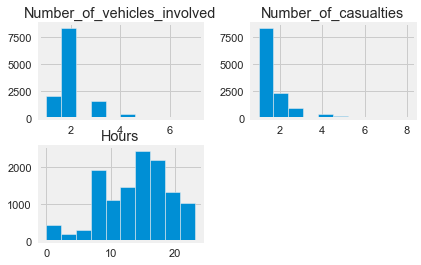

In [162]:
df_eda.hist()

**Does the numerical feature follow normal distribution?**

<AxesSubplot:xlabel='Number_of_vehicles_involved', ylabel='Density'>

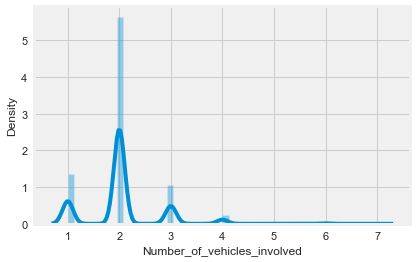

In [163]:
sns.distplot(df['Number_of_vehicles_involved'],kde = True)

#### QQ Plot Analysis

((array([-3.8617944 , -3.63945684, -3.51752013, ...,  3.51752013,
          3.63945684,  3.8617944 ]),
  array([1, 1, 1, ..., 7, 7, 7], dtype=int64)),
 (0.5895910465603204, 2.0406787918155245, 0.8557623242858671))

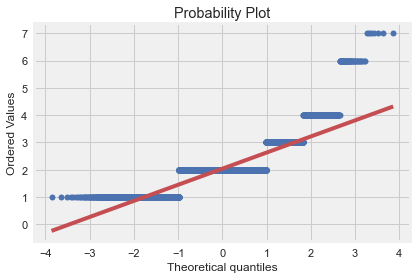

In [164]:
import scipy.stats as stats
import pylab 

stats.probplot(df2['Number_of_vehicles_involved'], dist="norm", plot=pylab)

We can clearly observe that the values are not normally distributed

### Analysis of Categorical Features

<AxesSubplot:xlabel='count', ylabel='Day_of_week'>

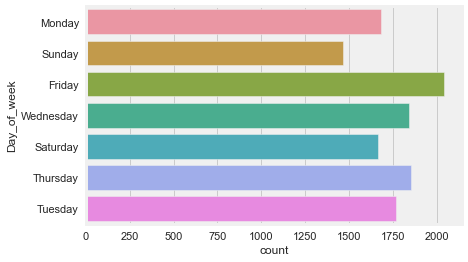

In [165]:
sns.countplot(y = "Day_of_week",data = df_eda)

**Observation :** 
Friday has the most number of accidents closely followed by Thursdays

In [179]:
df['Age_band_of_driver'].mask(df['Age_band_of_driver'] == 'Unknown',df['Age_band_of_driver'].mode().iloc[0], inplace=True)

<AxesSubplot:xlabel='count', ylabel='Age_band_of_driver'>

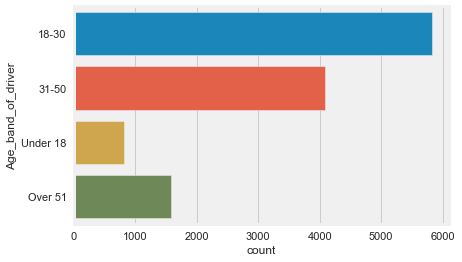

In [181]:
sns.countplot(y = 'Age_band_of_driver',data = df)

**Observation :**
Most of the drivers are in the range of 18-30 and 31-50 years

<AxesSubplot:xlabel='count', ylabel='Type_of_vehicle'>

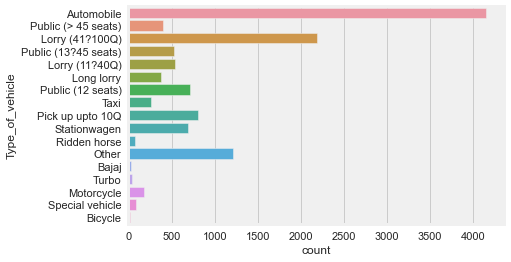

In [167]:
sns.countplot(y = 'Type_of_vehicle',data = df_eda)

**Observation :** More than 3000 accidents are caused by automobiles followed by Lorry 

In [182]:
df['Driving_experience'].mask(df['Driving_experience'] == 'NaN',df['Driving_experience'].mode().iloc[0], inplace=True)

<AxesSubplot:xlabel='count', ylabel='Driving_experience'>

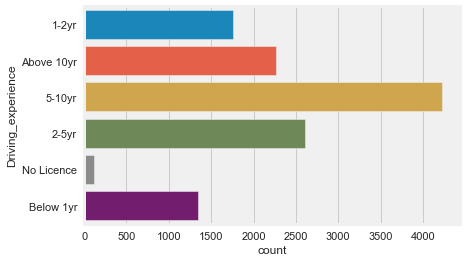

In [184]:
sns.countplot(y = 'Driving_experience',data = df)

**Observation** : Most of the accidents(close to 3250) are caused by the drivers in the experience level of 5-10 years

<AxesSubplot:xlabel='count', ylabel='Educational_level'>

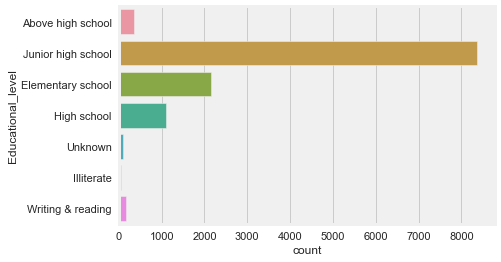

In [185]:
sns.countplot(y = 'Educational_level',data = df)

 

**Observation:** More than 7000 accidents / 130000 accidents are caused by drivers who are Junior high school grads.

In [187]:
df['Sex_of_driver'].mask(df['Sex_of_driver'] == 'Unknown',df['Sex_of_driver'].mode().iloc[0], inplace=True)

<AxesSubplot:xlabel='count', ylabel='Sex_of_driver'>

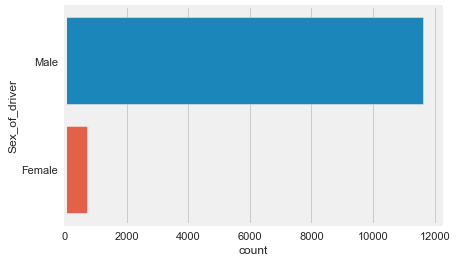

In [188]:
sns.countplot(y = 'Sex_of_driver',data = df)

**Observation** : More than 11000 observations have Male Drivers who caused the accident. This also indicates class imbalance in the dataset

<AxesSubplot:xlabel='count', ylabel='Cause_of_accident'>

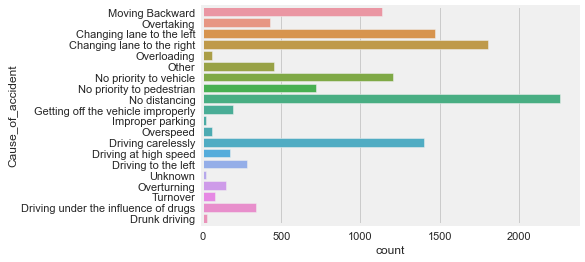

In [189]:
sns.countplot(y = 'Cause_of_accident',data = df_eda)

**Observation** : Not maintaining distance between vehicle and pedestrian has caused the most accidents caused by sudden lane changes

In [194]:
df['Owner_of_vehicle'].mask(df['Owner_of_vehicle'] == 'Other',df['Owner_of_vehicle'].mode().iloc[0], inplace=True)

<AxesSubplot:xlabel='count', ylabel='Owner_of_vehicle'>

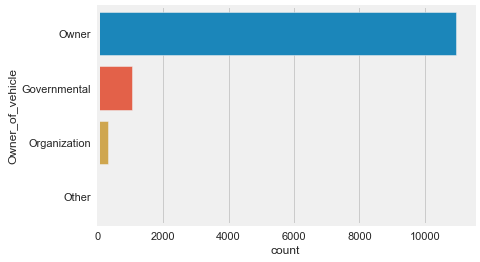

In [195]:
sns.countplot(y = 'Owner_of_vehicle',data = df_eda)

**Observation** : More than 10000 accidents are caused when the owner of the vehicle was riding

In [199]:
df_eda['Time_of_day'].mask(df_eda['Time_of_day'] == 'Morning',df_eda['Time_of_day'].mode().iloc[0], inplace=True)

<AxesSubplot:xlabel='count', ylabel='Time_of_day'>

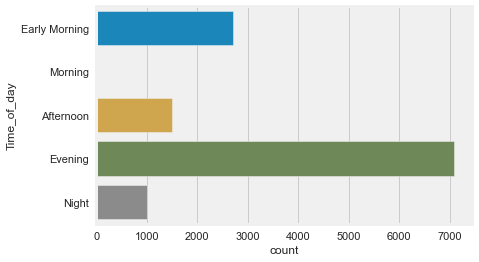

In [200]:
sns.countplot(y = 'Time_of_day',data = df_eda)

**Observation** : More than 7000 accidents accur in the evening

In [ ]:
sns.catplot(x="Time_of_day", y="Number_of_casualties",kind = 'swarm',hue = 'Sex_of_driver', data=df2)

### Pair Plot Bivariate Analysis

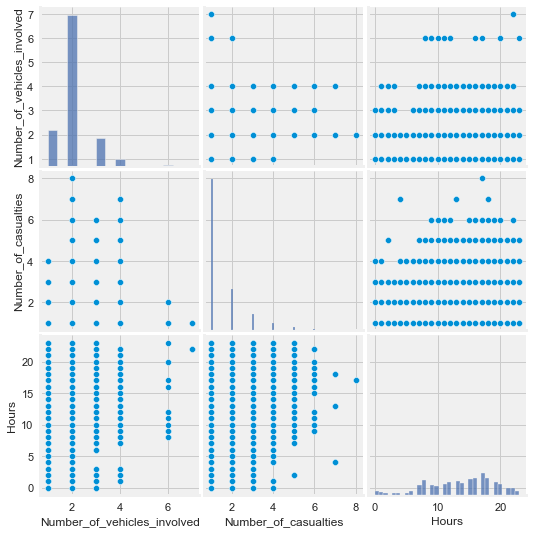

In [216]:
sns.pairplot(data = df2)

**Obervation** : No noticeable conclusion can be drawn from the pairplots

### Correlation Analysis and Heatmaps

In [218]:
corr = df2.corr()
corr

,Number_of_vehicles_involved,Number_of_casualties,Hours
Number_of_vehicles_involved,1.000000,0.213427,0.023095
Number_of_casualties,0.213427,1.000000,0.051761
Hours,0.023095,0.051761,1.000000


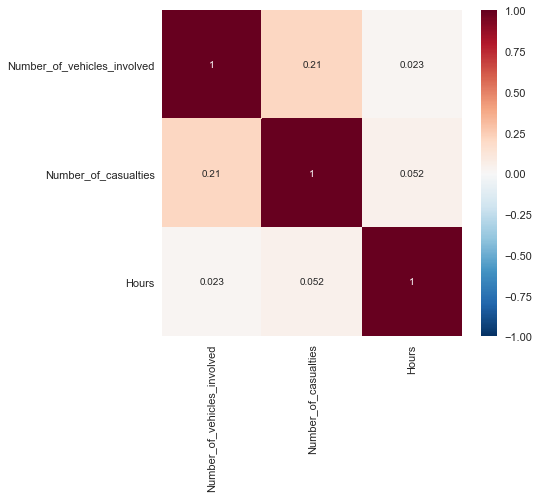

In [219]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

**Observation** : None of the features are strongly corelated but we see a small corelation of 0.21 between no of causalities and no of vehicles involved in the accident

### Are the Categorical Variables Corelated?

**Pearson Correlation Coefficient**

![](https://miro.medium.com/max/406/1*uOBToLtIFDfrNwnXLBv-7w.png)

Disadvantage : Only used for numerical features

**How to Tackle This?**

One option is one hot encoding. Let's try it

In [245]:
data_encoded = pd.get_dummies(df2)

In [246]:
data_encoded

,Number_of_vehicles_involved,Number_of_casualties,Hours,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,...,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Accident_severity_Fatal injury,Accident_severity_Serious Injury,Accident_severity_Slight Injury,Time_of_day_Early Morning,Time_of_day_Morning,Time_of_day_Afternoon,Time_of_day_Evening,Time_of_day_Night
0,2,2,17,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2,2,17,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,2,17,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,2,2,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,2,2,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,1,16,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
12312,2,1,18,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
12313,1,1,13,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
12314,2,1,13,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [247]:
corr = data_encoded.corr()

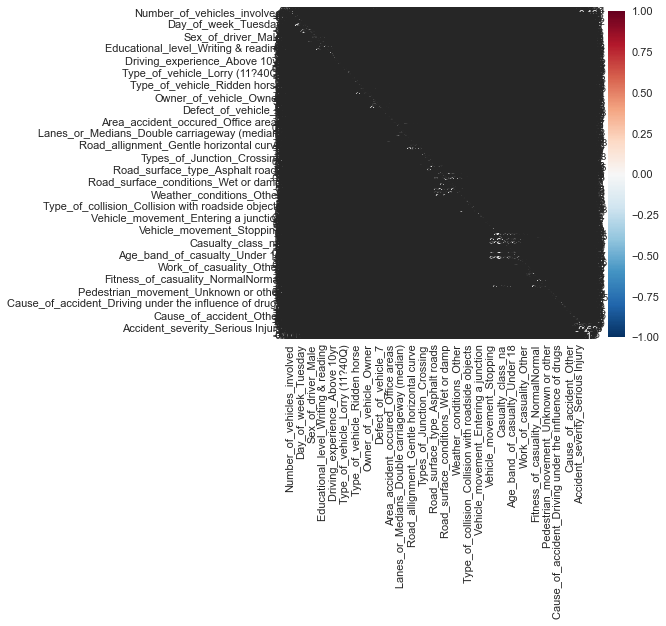

In [232]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

It takes a long time to run, isn't it?

Do we get any insights from the heatmap? No!

What we need is something that will look like correlation, but will work with categorical values — or more formally, we’re looking for a measure of association between two categorical features. Introducing: Cramér’s V. It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:

Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

### Cramer's V(Phi) Test

Chi-Square Test

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1ab35719428d2902cb4d6e364c8e09890b77fa11)

Cramer Test

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/79743fa9927bec7afc2a06e36451d64155d8f4b8)

k - no of columns
r - no of rows

In [248]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))


In [ ]:
# rows= []

# for var1 in data_encoded:
#     col = []
#     for var2 in data_encoded :
#         cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
#         col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
#     rows.append(col)
  
# cramers_results = np.array(rows)
# df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
# df

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# mask = np.zeros_like(df, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# with sns.axes_style("white"):
#     ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

# plt.show()
